In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../datasets/Telco_Customer_Churn.csv")

In [3]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4664,7571-YXDAD,Female,0,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),74.90,147.15,Yes
5036,1268-ASBGA,Female,1,Yes,No,16,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.35,1375.15,Yes
3298,1336-EZFZY,Female,0,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,83.3,No
3002,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,No
4949,3669-LVWZB,Male,0,No,No,5,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,51.00,305.95,Yes


In [4]:
df.drop(['customerID'], axis='columns', inplace=True)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# as we can see that we are having MonthlyChargers as float and TotalCharges as object, whereas both of them should have
# same datatype. Therefore we will convert the TotalCharges into numbers


df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [8]:
# so we got some errors bcz, there are are spaces in btw the numbers

pd.to_numeric(df.TotalCharges, errors='coerce') #cvt to numeric by ignoring the error (i.e spaces) by putting it a null val in that place

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
# getting all the null values

t_null = pd.to_numeric(df.TotalCharges, errors='coerce').isnull()
t_null

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[t_null]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df.shape

(7043, 20)

In [12]:
df[t_null].shape

(11, 20)

In [13]:
#so we will remove this columns

n_df = df[df.TotalCharges != " "]
n_df.shape

(7032, 20)

In [14]:
n_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [23]:
cp_df = df.copy()
cp_df['TotalCharges'] = pd.to_numeric(n_df.TotalCharges)

In [24]:
cp_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [25]:
#lets get the people who are not using the service

t_churn_no = cp_df[cp_df.Churn == 'No'].tenure
t_churn_ys = cp_df[cp_df.Churn == 'Yes'].tenure

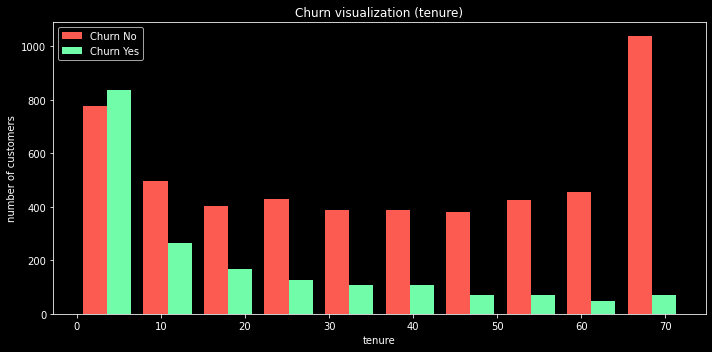

In [26]:
plt.style.use(['dark_background'])
plt.figure(figsize=(10, 5))

plt.title("Churn visualization (tenure)")
plt.ylabel('number of customers')
plt.xlabel('tenure')
plt.hist([t_churn_no, t_churn_ys], label=["Churn No", 'Churn Yes'], color=['#FC5B52', "#71FCAA"])
plt.tight_layout()
plt.legend()

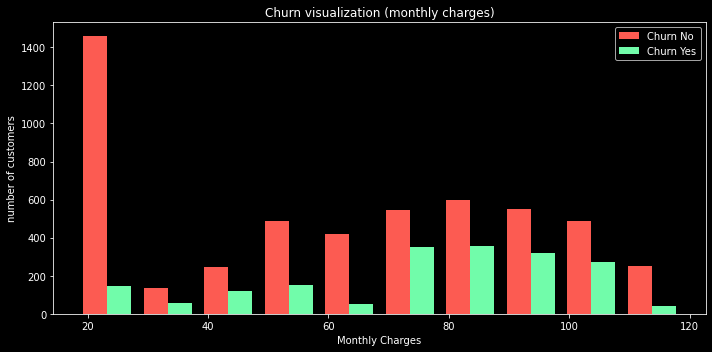

In [27]:
m_churn_no = cp_df[cp_df.Churn == 'No'].MonthlyCharges
m_churn_ys = cp_df[cp_df.Churn == 'Yes'].MonthlyCharges

plt.figure(figsize=(10, 5))

plt.title("Churn visualization (monthly charges)")
plt.ylabel('number of customers')
plt.xlabel('Monthly Charges')
plt.hist([m_churn_no, m_churn_ys], label=["Churn No", 'Churn Yes'], color=['#FC5B52', "#71FCAA"])
plt.tight_layout()
plt.legend()

In [29]:
# get the catagorial values
def get_obj_dt():
    for col in cp_df:
        if cp_df[col].dtype == 'object':
            print(f'{col} : {cp_df[col].unique()}')

In [30]:
get_obj_dt()

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']
